# Advanced Course in ML: Exercise Set 1

## Exercise 1.b) and 1.c)

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams["figure.figsize"] = (36, 36)
font = {'size'   : 20}
plt.rc('font', **font)

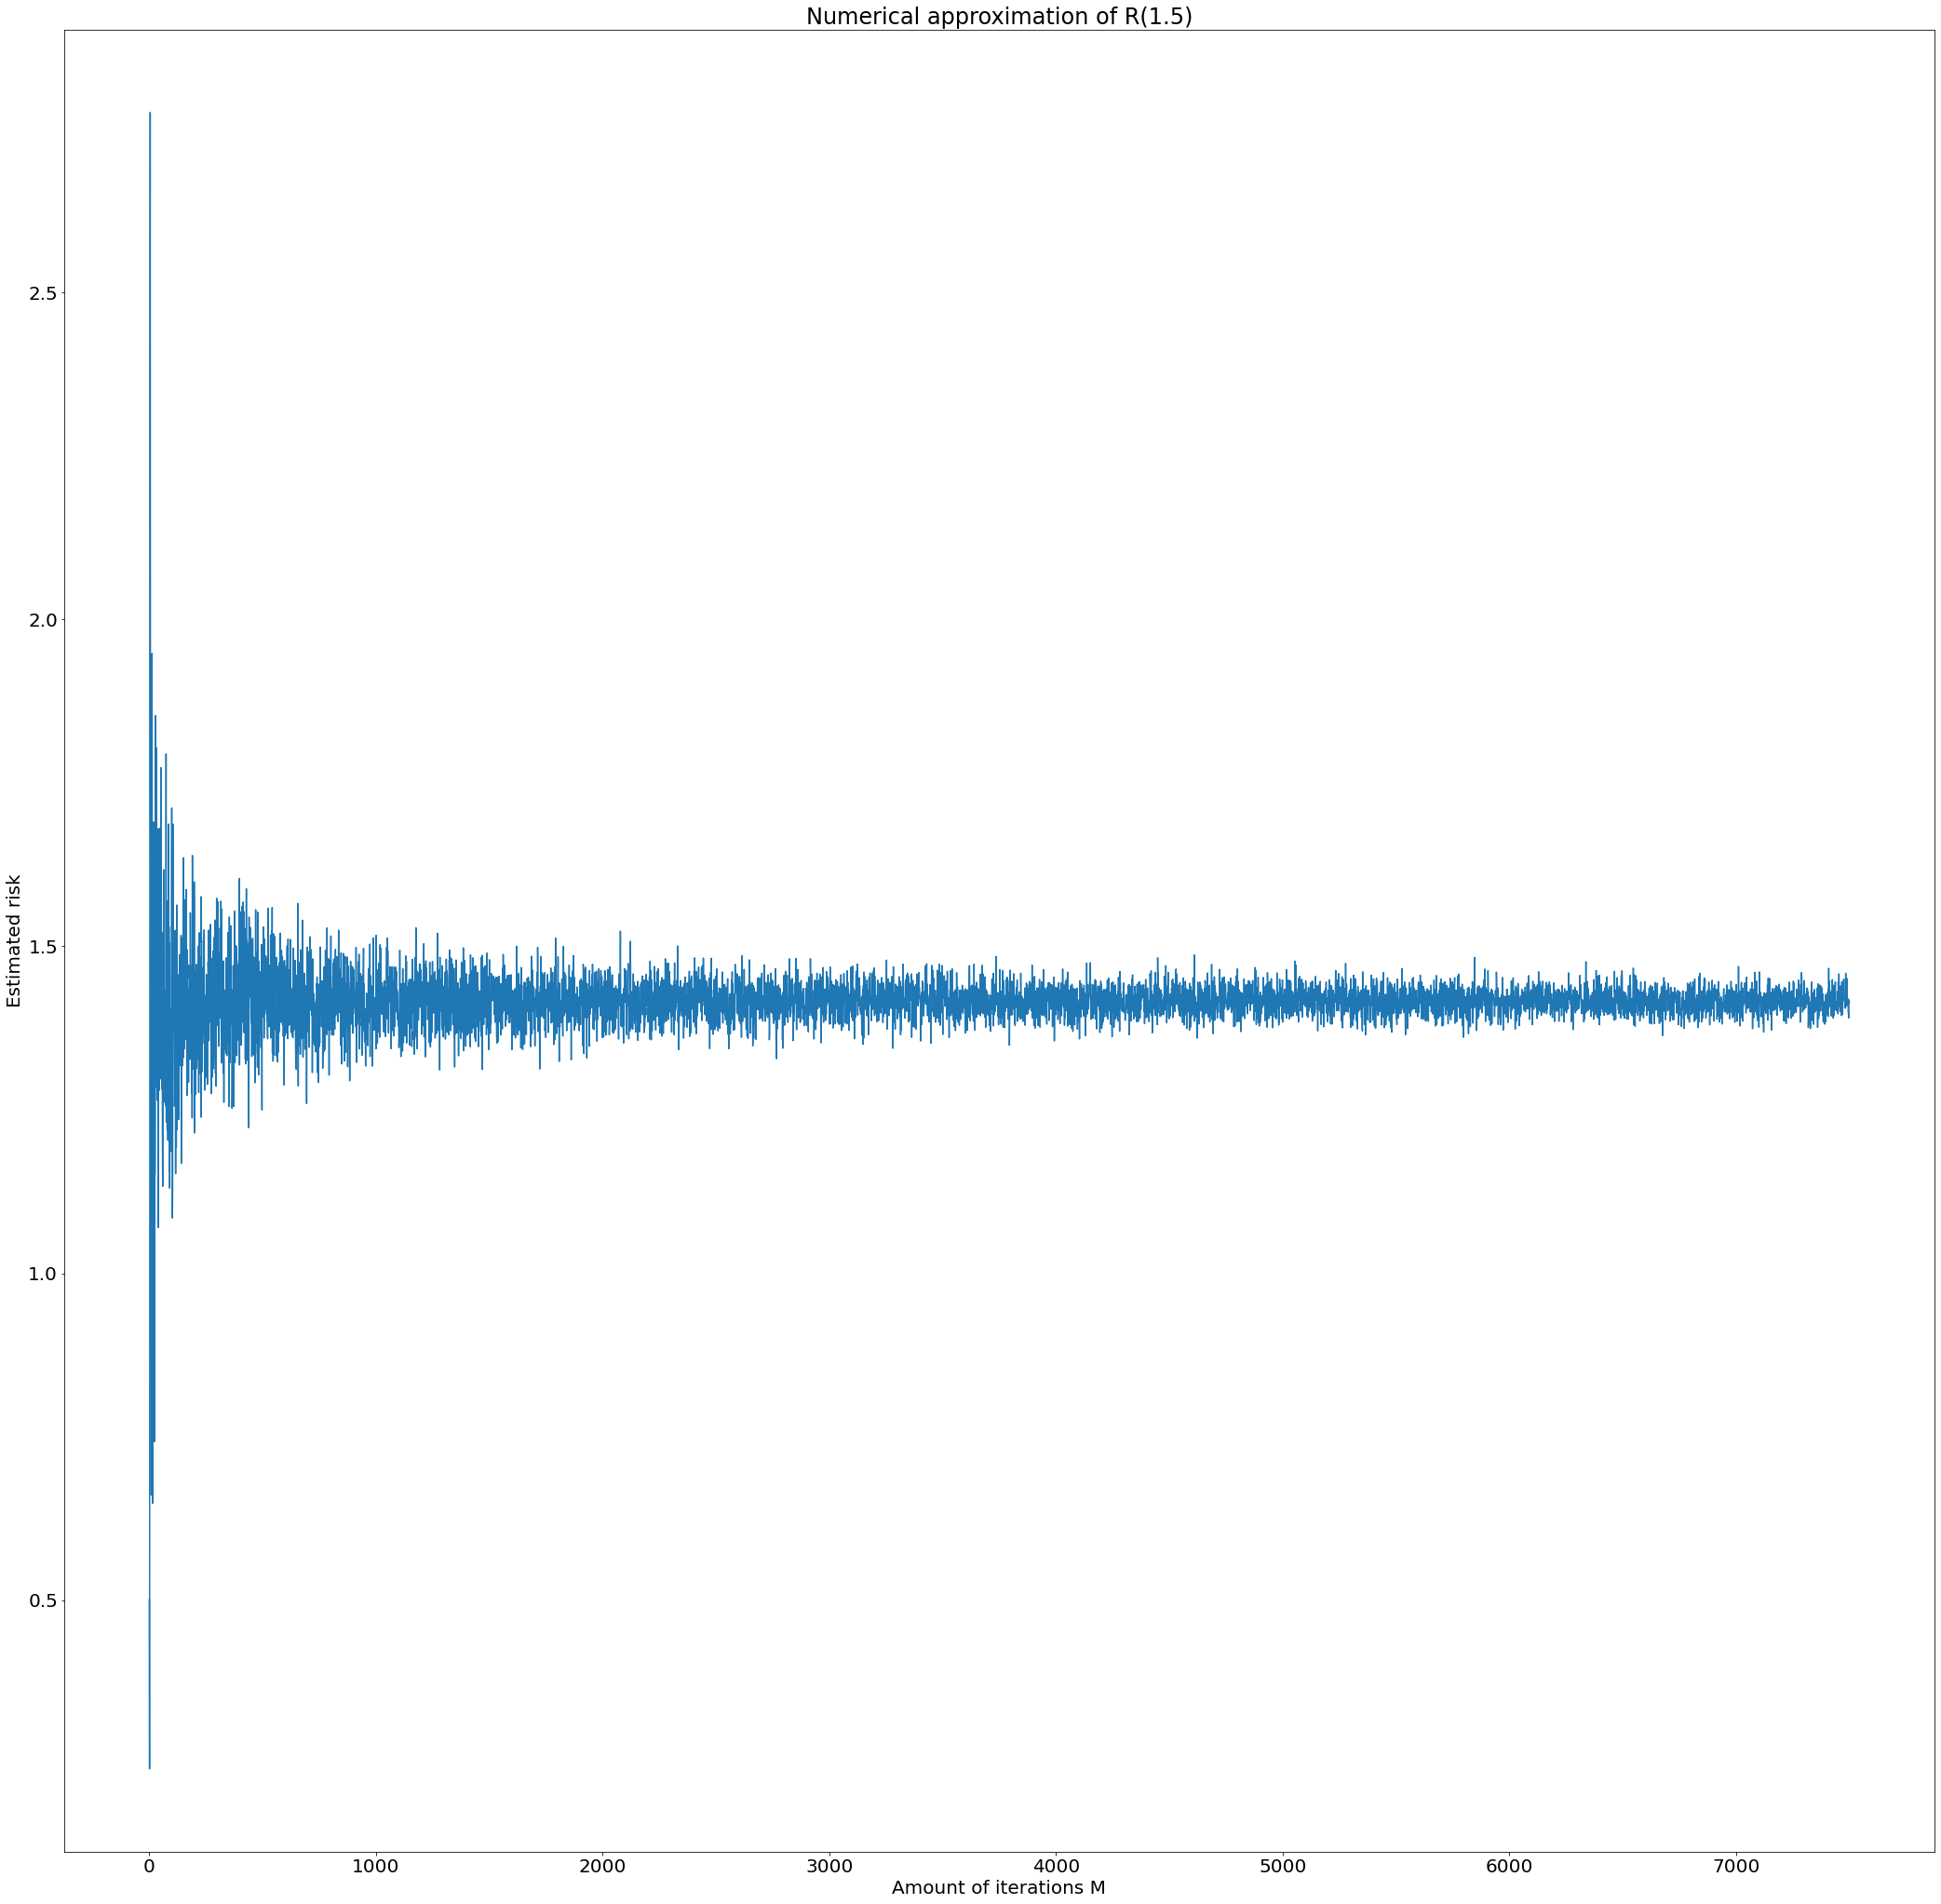

Last estimate: 1.415518975144167


In [2]:
def estimate_risk(alpha, M=1000):
    x = npr.uniform(-4, 4, M)
    y = npr.uniform(2*x-0.5, 2*x+0.5)
    
    return np.mean( (y - alpha*x)**2 )

M_size = 7500
M_arr = np.arange(1, M_size+1, 1, dtype=np.int32)
result_risk = np.array([estimate_risk(1.5, M) for M in M_arr])

plt.plot(M_arr, result_risk)
plt.xlabel("Amount of iterations M")
plt.ylabel("Estimated risk")
plt.title("Numerical approximation of R(1.5)")

plt.show()

print("Last estimate:", result_risk[-1])

The theoretical value of the minimum risk, which was obtained by "pen and paper", is given by:

$$R(1.5)=\frac{16(2-1.5)^2}{3}+\frac{1}{12} \approx 1.41667$$

We can see that the estimated value via simulation is considerably close to the theoretical value, although it is off by a small amount due to random noise. If the sample size tended to infinity, it should converge to the true value.

## Exercise 5

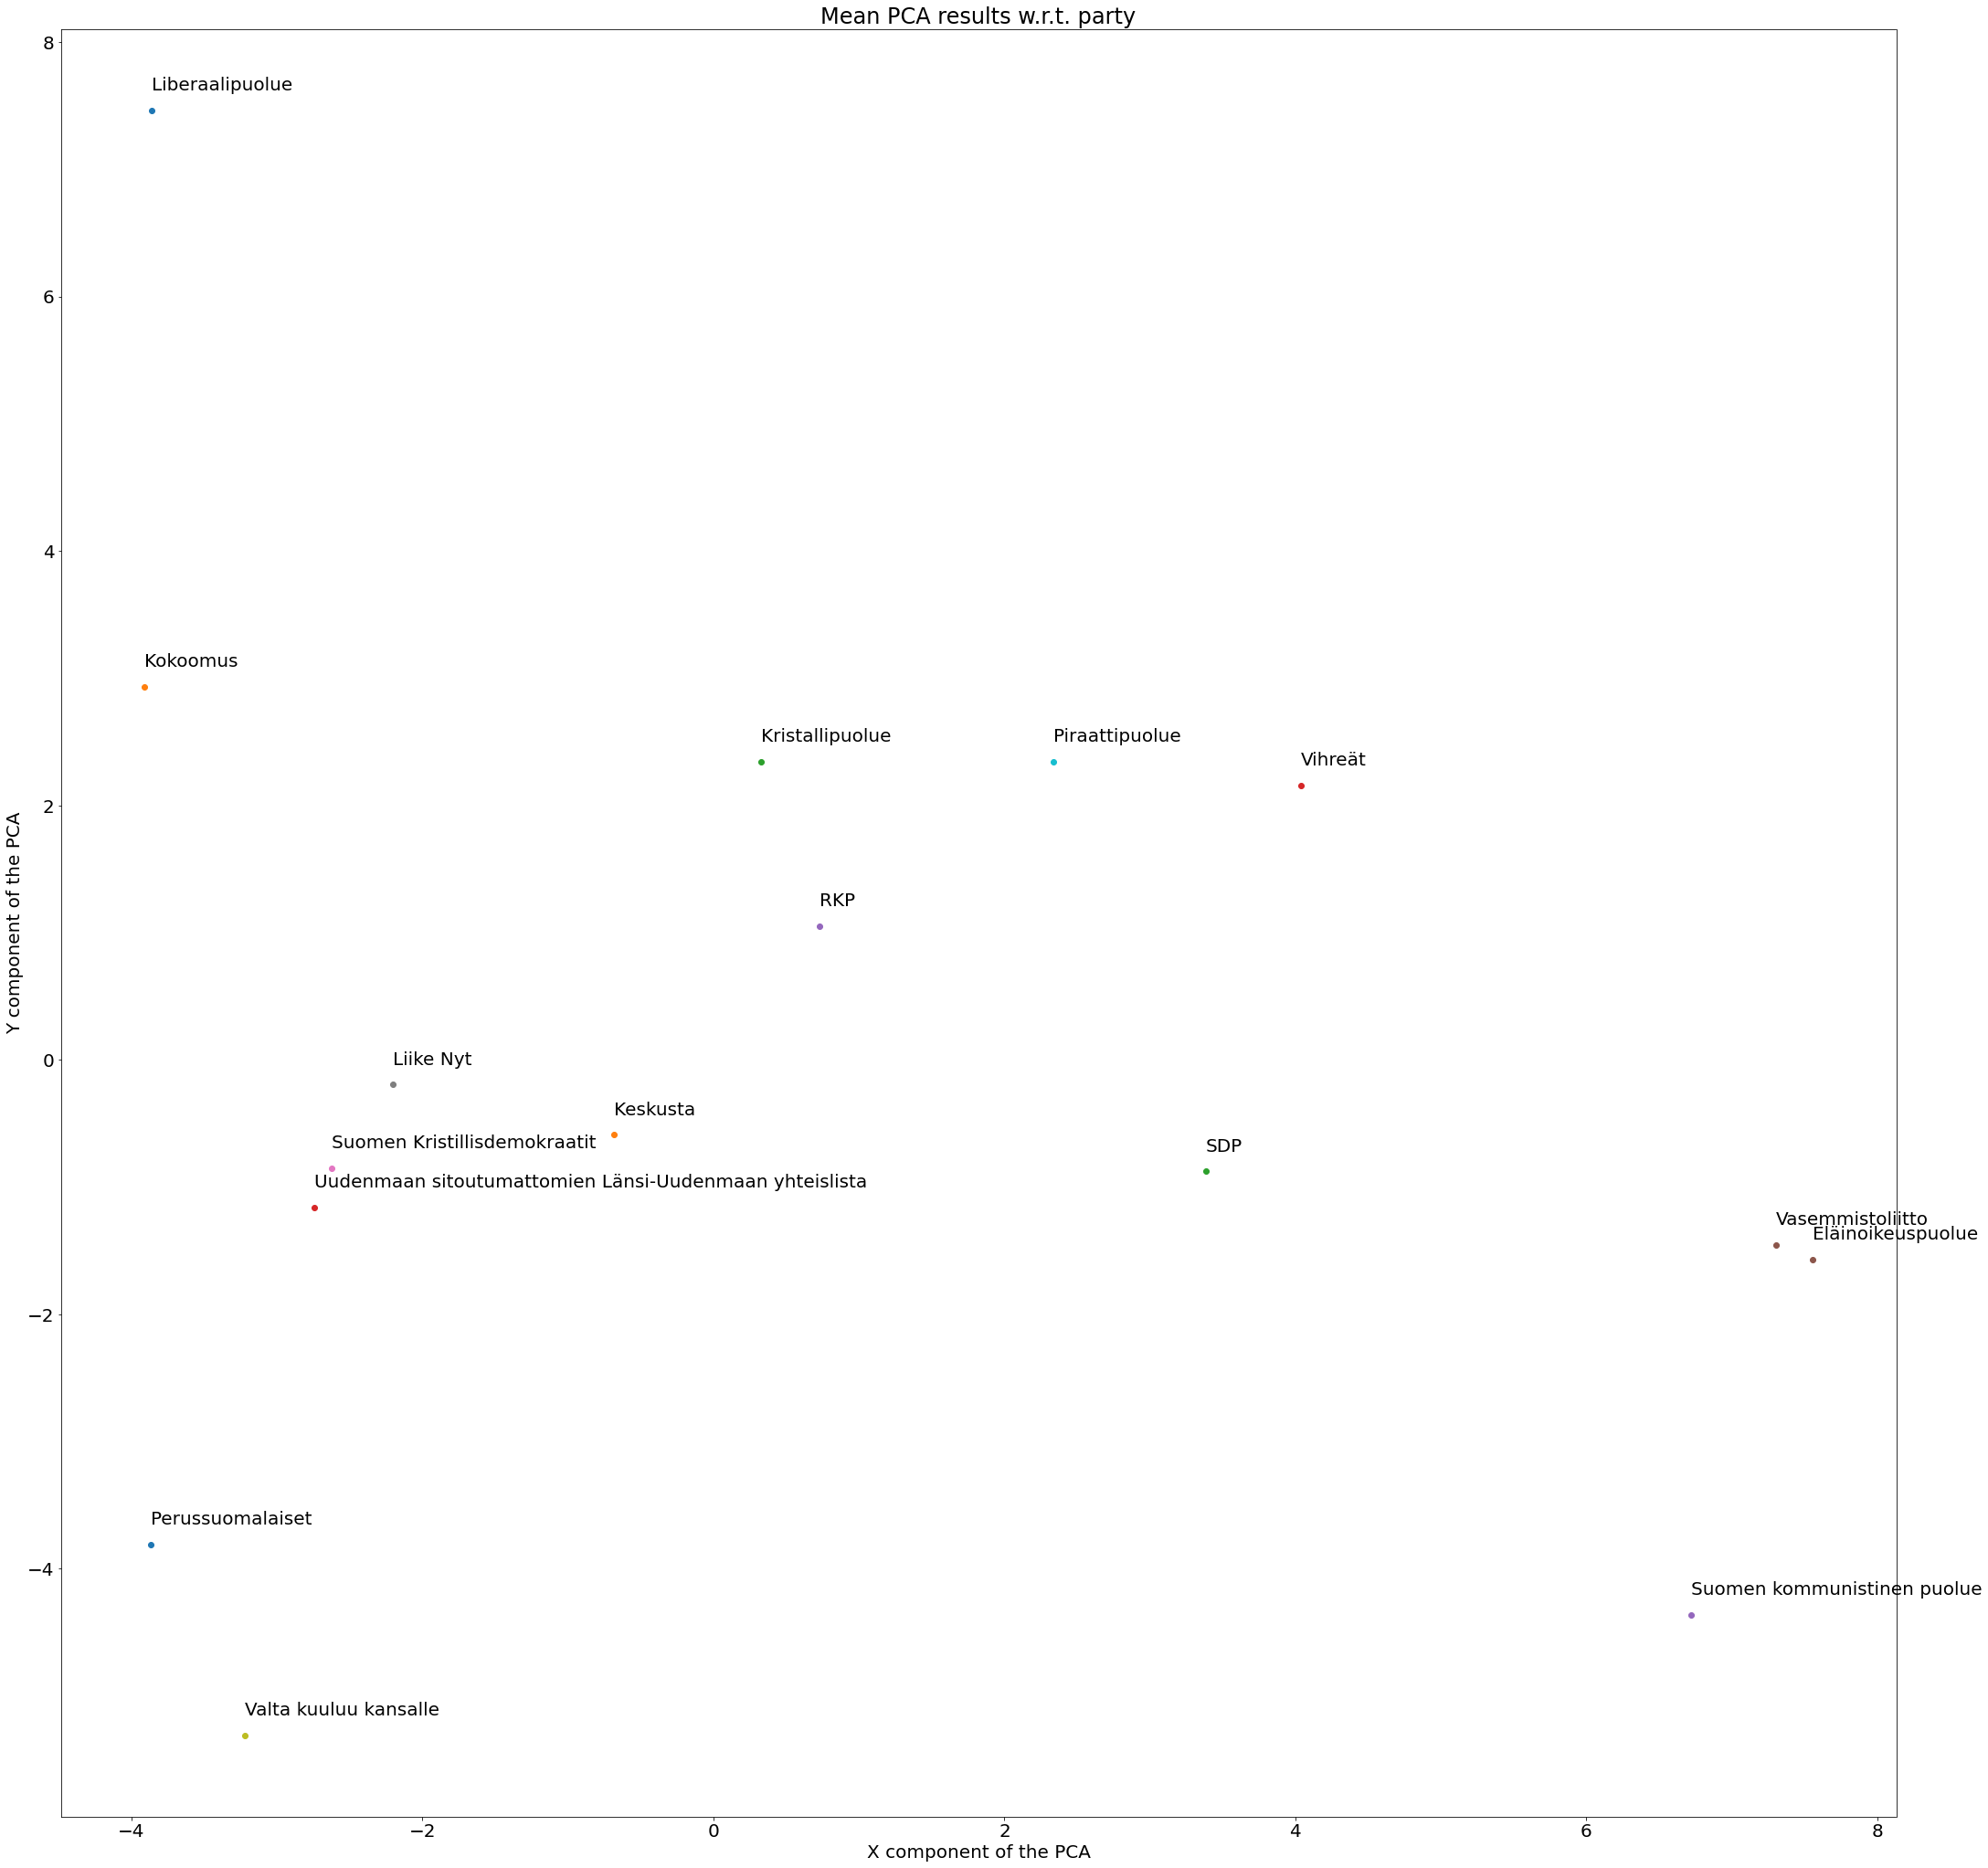

In [3]:
data = np.loadtxt("elec2022.txt", delimiter=" ")
parties = data[:, 0]
answers = data[:, 1:]

model = PCA(2, copy=True)
reduced_x = model.fit_transform(answers)

with open("parties.txt", "r") as f:
    for line in f:
        party_id, party_name = line.split(' ', 1)
        party_id = int(party_id)
        party_mean = reduced_x[parties == party_id].mean(axis=0)
        plt.scatter(party_mean[0], party_mean[1], label=party_name)
        plt.annotate(party_name, (party_mean[0], party_mean[1]))

plt.xlabel("X component of the PCA")
plt.ylabel("Y component of the PCA")
plt.title("Mean PCA results w.r.t. party")
plt.show()